# Train Custom Model Using Scikit Learn - Deadlift
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('deadlift_coords.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618


In [4]:
print(df['class'].unique())

['d_correct_down' 'd_correct_up' 'd_spine_neutral_up'
 'd_spine_neutral_down' 'd_arms_spread_up' 'd_arms_spread_down'
 'b_arms_narrow_up' 'b_arms_narrow_down']


In [5]:
df[df['class'] == 'd_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092
5,d_correct_up,0.630466,0.228244,0.440133,0.998669,0.629182,0.218079,0.382716,0.998379,0.627187,...,0.210587,0.938545,0.584299,0.639840,-0.097903,0.926428,0.755004,0.633011,0.161734,0.733194
10,d_correct_up,0.697473,0.158551,0.451071,0.991049,0.692633,0.149205,0.382283,0.992482,0.686416,...,0.330992,0.954461,0.581112,0.643122,0.014938,0.909410,0.748414,0.635549,0.268348,0.836252
11,d_correct_up,0.720811,0.144309,0.346179,0.996304,0.718774,0.134078,0.272779,0.996799,0.714024,...,0.398919,0.963658,0.586293,0.644027,-0.037683,0.930052,0.740474,0.637417,0.354408,0.848932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,d_correct_up,0.523595,0.143818,-0.166640,0.999999,0.540697,0.128956,-0.135898,0.999996,0.550788,...,0.071508,0.844653,0.613329,0.800536,-0.173847,0.985089,0.312023,0.792732,-0.171635,0.986759
784,d_correct_up,0.520855,0.176195,-0.409605,0.999999,0.539977,0.157631,-0.393470,0.999997,0.550829,...,0.055849,0.888812,0.611766,0.797540,-0.138262,0.990298,0.311788,0.791406,-0.113156,0.991191
789,d_correct_up,0.514838,0.169958,-0.458523,0.999998,0.533339,0.156689,-0.441334,0.999994,0.544492,...,0.032376,0.886017,0.610073,0.797977,-0.140207,0.976021,0.320147,0.790432,-0.156754,0.981841
790,d_correct_up,0.534706,0.127905,-0.167135,0.999998,0.553773,0.116206,-0.138962,0.999994,0.563353,...,0.109827,0.869745,0.612978,0.800355,-0.145044,0.982977,0.319255,0.792244,-0.115669,0.985714


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [10]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [12]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [13]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [18]:
fit_models['rc'].predict(X_test)

array(['d_correct_down', 'd_arms_spread_up', 'd_correct_up',
       'd_correct_down', 'd_spine_neutral_down', 'd_spine_neutral_up',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'b_arms_narrow_up', 'd_arms_spread_down', 'd_spine_neutral_down',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'd_arms_spread_up', 'd_arms_spread_down', 'd_spine_neutral_up',
       'd_spine_neutral_up', 'b_arms_narrow_up', 'd_spine_neutral_up',
       'd_spine_neutral_down', 'b_arms_narrow_down', 'd_arms_spread_down',
       'd_arms_spread_up', 'd_correct_down', 'd_arms_spread_down',
       'd_correct_up', 'b_arms_narrow_up', 'd_spine_neutral_down',
       'd_spine_neutral_down', 'd_correct_down', 'd_correct_up',
       'd_correct_up', 'd_spine_neutral_down', 'd_correct_down',
       'd_correct_up', 'd_correct_up', 'b_arms_narrow_up',
       'd_correct_down', 'b_arms_narrow_up', 'd_arms_spread_up',
       'd_arms_spread_up', 'd_arms_spread_down', 'b_arms_narrow_down',
     

## 3.Evaluate and Serialize Model

In [19]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                      precision    recall  f1-score   support

  b_arms_narrow_down       0.97      0.93      0.95        40
    b_arms_narrow_up       0.82      0.84      0.83        44
  d_arms_spread_down       0.90      1.00      0.95        38
    d_arms_spread_up       0.83      0.94      0.88        32
      d_correct_down       0.97      0.91      0.94        35
        d_correct_up       0.94      0.84      0.89        57
d_spine_neutral_down       0.88      0.95      0.91        44
  d_spine_neutral_up       0.88      0.83      0.85        52

            accuracy                           0.90       342
           macro avg       0.90      0.91      0.90       342
        weighted avg       0.90      0.90      0.90       342


--- rc 모델 분류 결과 평가 ---
                      precision    recall  f1-score   support

  b_arms_narrow_down       0.97      0.78      0.86        40
    b_arms_narrow_up       0.81      0.89      0.85        44
  d_arms_spread_dow

In [20]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.8977
rc: 0.8743
rf: 0.9474
gb: 0.9474
--- precision ---
lr: 0.9003
rc: 0.8816
rf: 0.9491
gb: 0.9489
--- recall ---
lr: 0.8977
rc: 0.8743
rf: 0.9474
gb: 0.9474
--- f1-score ---
lr: 0.8974
rc: 0.8732
rf: 0.9472
gb: 0.9476


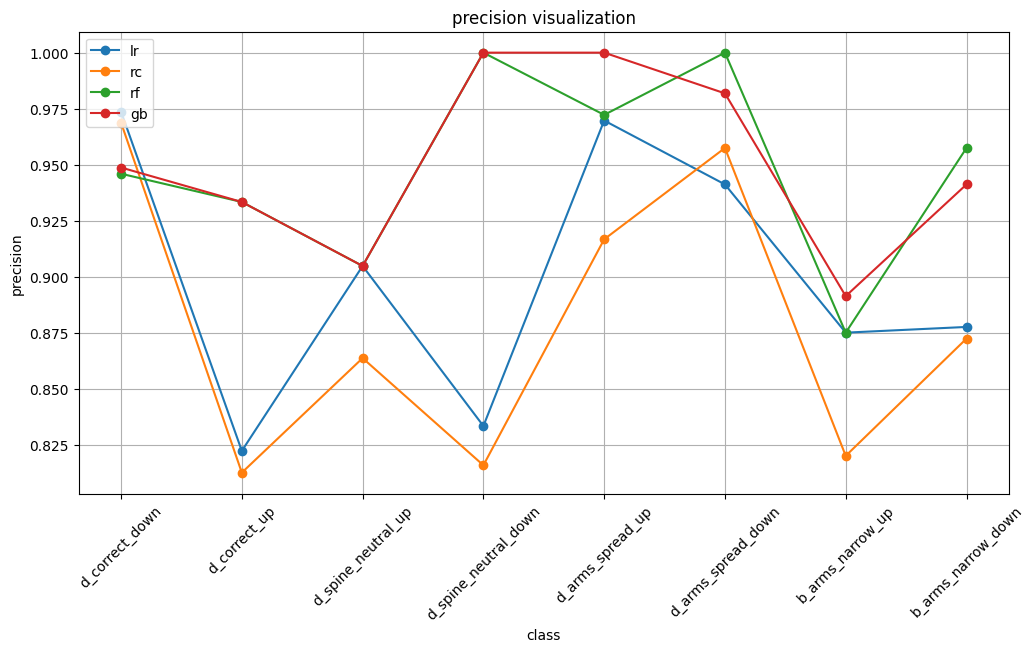

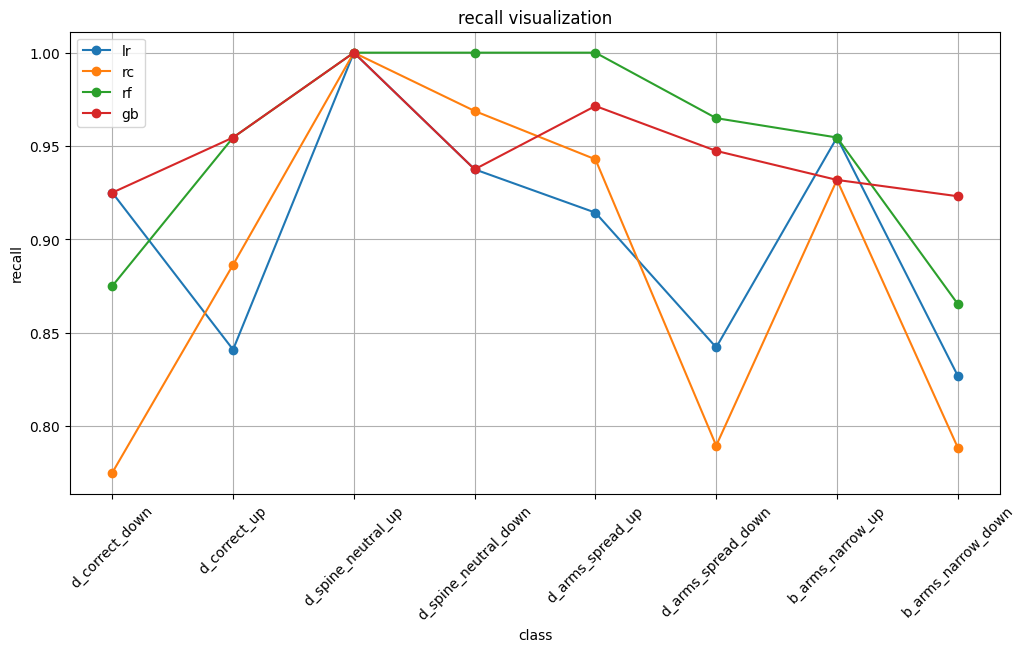

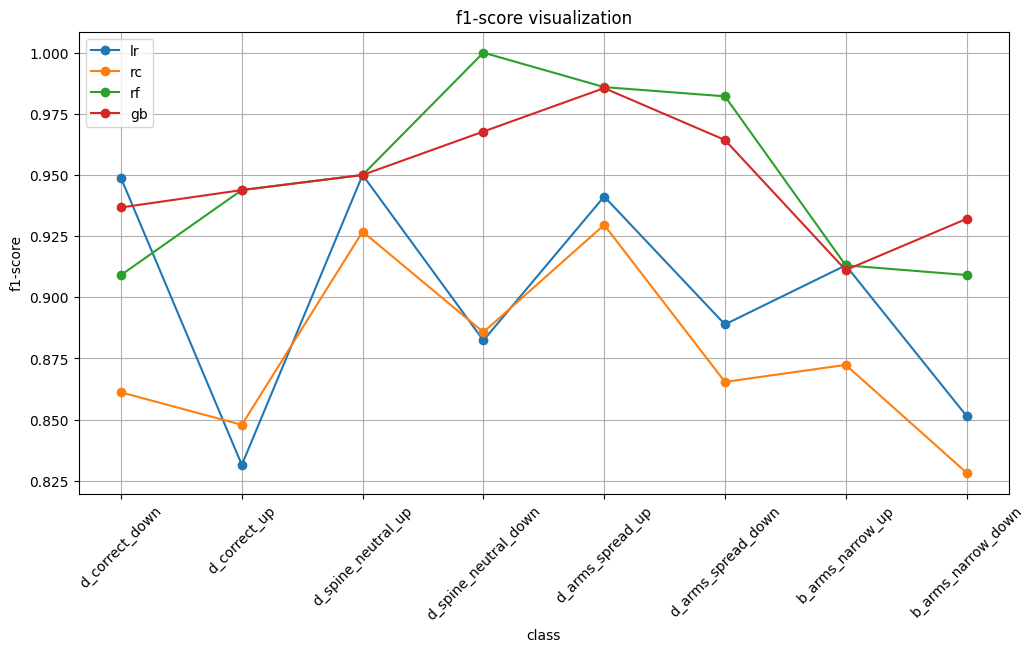

In [21]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [22]:
with open('deadlift.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)